#Introduction to Databases with SQL

Welcome to the introductory SQL class at Software Training for Students! Structured Query Language (SQL) is a database programming language that allows us to query, process, and model data in tables. As the most widespread database language, it has numerous applications in data science, engineering, management, and research.

This Jupyter Notebook contains exercises you can follow along with in class.

##Introduction to Jupyter Notebooks

Jupyter Notebooks is an open-source web application that allows you to create and share documents containing blocks of code, equations, visualizations, and narrative text. Jupyter Notebooks are particularly popular in data science and research communities due to their interactive and versatile nature.

Today, we will use Google Colab, a cloud-based version of Jupyter Notebook. Similar to Google Docs or Google sheets, we can create new notebooks, share them, and have multiple people editing them at a time all in the web browser.

Within any Jupyter Notebook (.ipynb file), we can create blocks of text or code that we can run individually. Jupyter supports a variety of languages including Python, R, Julia, and SQL. Since we can run many blocks of code in the same place and instantly see results, Jupyter is a great integrated environment for all kinds of data processing, analysis, and machine learning in both academia and industry.

Try running a block of code by clicking the arrow icon within the brackets at the top left corner. Let's run the next few blocks right below us to set up our environment.


In [ ]:
#RUN THIS FIRST!

#initialize notebook

#load SQL extension
%load_ext sql

In [ ]:
#download database
!gdown https://github.com/Pala-Dylan/STS-Introduction-To-Databases-With-SQL/raw/main/chinook/chinook.db

In [ ]:
#connect to database
%sql sqlite:///chinook.db

##0. Introduction to the Chinook database

The Chinook database is a sample database for learning SQL, made available for use by the [SQLite Tutorial website](https://www.sqlitetutorial.net/sqlite-sample-database/). It models a database for a music store, with information about its customers, employees, purchases, and music that it sells.


This big, scary diagram (called an ER Diagram) shows its schema:

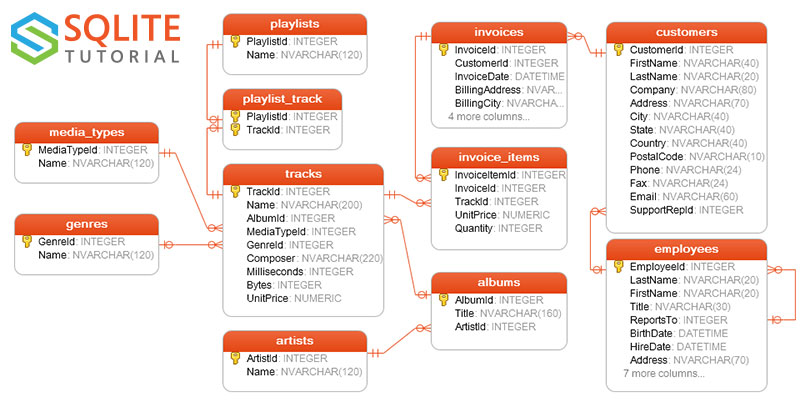

For the purposes of this workshop, we don't need to know what all these arrows mean. Just know that this will tell us the tables and columns that exist in the database, and that connected tables are related in some way.


Some additional information from the website:


There are 11 tables in the chinook sample database.

**employees** table: stores employees data such as employee id, last name, first name, etc. It also has a field named ReportsTo to specify who reports to whom.

**customers** table: stores customers data.

**invoices** & **invoice_items** tables: these two tables store invoice data. The invoices table: stores invoice header data and the invoice_items table stores the invoice line items data.

**artists** table: stores artists data. It is a simple table that contains only the artist id and name.

**albums** table: stores data about a list of tracks. Each album belongs to one artist. However, one artist may have multiple albums.

**media_types**: table stores media types such as MPEG audio and AAC audio files.

**genres** table: stores music types such as rock, jazz, metal, etc.

**tracks** table: stores the data of songs. Each track belongs to one album.

**playlists** & **playlist_track** tables: playlists table store data about playlists. Each playlist contains a list of tracks. Each track may belong to multiple playlists. The relationship between the playlists table and tracks table is many-to-many. The playlist_track table is used to reflect this relationship.

###Viewing schema information

If we want to view table and column information in SQL itself, we can query it.

Let's get all the table names run the below cell by clicking the arrow icon. Note that we have to tell Jupyter that we're running SQL by typing **%%sql** (all lowercase)

In [ ]:
%%sql
SELECT name
FROM sqlite_master
WHERE type='table'

We can also get the column information from PRAGMA table_info. Simply replace the table in parentheses () with the table you want to see the info for.

In [ ]:
%%sql
PRAGMA table_info(employees);

##1. Basic Queries

###Querying Data (**SELECT**)

The most basic queries begin with a SELECT statement and FROM statement.

SELECT– pulls data from set number of columns from a table
FROM – the table from which you select

The syntax looks like this:

**SELECT column1, [column2], …[column n]**

**FROM [Table]**

NOTE: It is possible to select from multiple tables, but we will talk about that later

For example, if we want to pull the names and addresses of each customer in our sample database, we can write:


In [ ]:
##run queries--we must write %%sql before our queries to tell Jupyter that we are using SQL as our language
%%sql --Tell Jupyter that we're writing SQL code




Note: SQL is case insensitive, but it is good practice to use all capitals for keywords (SELECT, FROM, WHERE, etc) and to spell column names exactly as they are written in the table.

To select all columns, we use the * character.

In [ ]:
%%sql


We can also get each unique value of a column using the keyword **DISTINCT** in our **SELECT** statement.

In [ ]:
%%sql


####Exercise 1.1

We are generating a mailing list to send promotional material to our customers. Query a list of full names (first and last) and mailing addresses for all of our customers. To mail something, we need their street address, city, state, country, and postal code.

In [ ]:
%%sql
--Place your answer here!


###Table/Column Aliasing (**AS**)

Sometimes using the original names of columns or tables is unwieldy or not visually appealing.  We can rename tables and columns using the AS keyword, or simply typing the new name after the original. This is known as aliasing. If we’re selecting from multiple tables, we can refer to them by their alias instead of their original table names.


In [ ]:
%%sql
--3 ways to alias: with AS, with quotes, and with no quotes


--Note: If the alias is contains a space, we need quotes around it so SQL doesn't confuse it with another column


####Exercise 1.2

To foster company spirit, HR believes it's important for the supervisors to send cards to their direct reports on their birthday. An HR analyst wrote a query to report the data, but forgot to specify whose name was the employee's and whose was the supervisors.

In the below query, rename the columns to specify which is the employee and which is the supervisor. (HINT: columns beginning with "employee.[something]" are the employee's, and "ReportsTo.[something]" are the supervisor's



In [ ]:
%%sql
--Place your answer here!

SELECT employee.EmployeeID, employee.FirstName, employee.LastName, reportsTo.FirstName, reportsTo.LastName, employee.BirthDate, employee.Email
FROM employees employee
LEFT JOIN employees reportsTo ON employee.ReportsTo = reportsTo.EmployeeID;

###Sorting Data (**ORDER BY**)

When we’re selecting data, we return the rows in the order that they were stored. We may want to sort the data, alphabetically or least to greatest for example. To do that, we use the **ORDER BY** keyword. Just as the name implies, **ORDER BY** sorts the results in order based on the value of a certain column or set of columns. We can also use the optional parameters **ASC** (ascending) or **DESC** (descending) to decide the order. If not specified, it uses ASC by default.


In [ ]:
%%sql



#### Exercise 1.3

Generate a list of invoices in the order of least total amount to greatest total amount. Feel free to use **SELECT** *

In [ ]:
%%sql
--Place your answer here!

###Limiting data (**LIMIT**)

There are situations where we don’t want to select every row in a table. A common use case is when you want the top 10 of something. Additionally, sometimes a table is too large and you might want to only select a few rows just to get a snapshot of the data. To do this, we use the **LIMIT** keyword. **LIMIT** is often, but not always, paired with ORDER BY so that we can grab the top N or bottom N rows. The syntax looks like this:

In [ ]:
%%sql

--get the top 10 most expensive invoices that customers have



#### Exercise 1.4

Generate a list of the 40 shortest tracks in milliseconds. Include the name of the track and its runtime in milliseconds.

In [ ]:
%%sql
--Place your answer here!

###Summary

The base of every query is a **SELECT** statement that pulls certain columns from a table, and a **FROM** statement telling which table to pull from.

We can sort the data using **ORDER BY**, and **LIMIT** our results to a certain number.

For readability, we can also rename our columns and tables using **AS**

| Keyword      | Definition                                           |
|--------------|------------------------------------------------------|
| SELECT       | Grab certain columns from a table                    |
| *            | When used with SELECT, grab all columns from a table  |
| DISTINCT     | Grab only unique values from a column                |
| FROM         | Denotes the table we are getting data from           |
| AS           | Rename a column or table in our result set           |
| ORDER BY     | Sort in ascending or descending order based on the values in a given column |
| ASC/ASCENDING| Sort least to greatest                               |
| DESC/DESCENDING| Sort greatest to least                               |
| LIMIT        | Grab the first X rows in a table, where X is a user-specified number |


###Chapter Exercise

Get a list of the top 10 most-tenured employees (i.e. the ones who were hired the earliest). Display their name, title, supervisor, and the date they were hired.

Challenge: Name the columns something reasonable and meaningful, where applicable.

In [ ]:
%%sql
--Place your answer here!


##2. Conditionals (**WHERE**)
Everything we’ve learned thus far pertains to selecting data without much restriction. There are certainly cases where we can simply select a column or two and gain meaningful insight, but SQL’s functionality for conditionals gives us a lot more flexibility when selecting data. We can use the **WHERE** keyword to select data based on certain conditions, such as a data value being greater than a certain amount or a column containing a certain word.

The conditions in where clauses are built upon logical statements that state whether a condition is TRUE or FALSE. Much like how arithmetic operations such as addition or subtraction return a numeric result, a logical operation returns TRUE or FALSE depending on whether the condition described is fulfilled or not.



###Comparing using Equality (**=**, **LIKE**, and **<>**)

Let's take a look at some examples with text data. For example, if we wanted to see all the customers from Brazil, we could do this:

In [ ]:
%%sql
--demonstrating where clauses



The **=** operator checks for complete equality, meaning that the string on the left and string on the right must have the same exact characters in the same exact places (case sensitive).

For text, the **LIKE** operator is much more flexible because it uses less stringent criteria for equality, including case insensitivity. In general, it is preferable to use the **LIKE** operator for text instead of **=** because of this flexibility

In [ ]:
%%sql
--demonstrating "like" - pattern matching


The **LIKE** operator also lets us use the wildcard character (**%**) to represent unknown or variable parts of a string.

For example, a long time ago the country known as the Czech Republic used to be called Czechoslovakia. If we don't know which way it is listed in our database, we could use a wildcard to capture both these spellings:

In [ ]:
%%sql
--demonstrating wildcards



Lastly, we can use the "not equal" operator **<>** to find inequality.

If we wanted to find all the invoices from international customer (i.e. not from the USA), then we can do this:

In [ ]:
%%sql
--demonstrating not equals


#### Exercise 2.1

Return a list of tracks composed by Wolfgang Amadeus Mozart. Include the track name and the composer name.

Challenge: What if you only knew his last name?

In [ ]:
%%sql
--Place your answer here!


###Comparing using Inequality (**<**, **>**, **<=**, **>=**)

We can also compare whether a number is greater than or less than a number,  whether some text is before or after another alphabetically, or even whether a date is earlier or later than another. We use the following operators for this:
**<** - less than
**>** - greater than
**<=** - less than or equal to
**>=** - greater than or equal to

In [ ]:
%%sql
--demonstrating conditionals-- =, <>, <, >, <=, >=
select *
from invoices
Where total < 4


#### Excercise 2.2

The music store has decided to split up the team into two floors by their last names in alphabetical order . In other words, people whose last name begins with A - M are on one floor, and those with last names beginning with N - Z are on another.

Write a query to find the employees whose last names begin with A - M. Include their first and last name, and keep it in alphabetical order by last name.

In [ ]:
%%sql
--Place your answer here!


###Dealing with **NULL** values

In SQL, we cannot make comparisons between NULL and non-NULL values, as they will not return either **TRUE** or **FALSE** values. In order to deal with **NULL**s, we must use the **IS NULL** and **IS NOT NULL** operators:

In [ ]:
%%sql
--demonstrating how to deal with nulls
Select *
from invoices
Where BillingState IS NOT NULL
--Where BillingState IS NULL


####Exercise 2.3

Return a list of customers who are not associated with a company (in other words, they don't have a value for the Company column)


In [ ]:
%%sql
--Place your answer here!


###Combining Conditionals

We can write even more powerful queries by combining them using **AND** and **OR**.

**AND** - condition A and condition B must return TRUE for the whole statement to be **TRUE**

**OR** - either condition A or condition B must return TRUE for the whole statement to be **TRUE**

In [ ]:
%%sql
--demonstating AND, OR, NOT


We can also place our conditions in parentheses () to separate them, making them evaluate independently from one another. This can help with readability as well as making your conditions work the way you want them to work.

In [ ]:
%%sql



UsageError: Cell magic `%%sql` not found.


###Summary

We use **WHERE** clauses to filter the data in our **SELECT** statements. **WHERE** clauses use conditional clauses constructed from logical operators, listed below:

| Logical Operator | Definition                       | TRUE Examples                           |
|-------------------|----------------------------------|-----------------------------------------|
| <                 | less than                        | 1 < 5                                   |
|                   |                                  | 'Aardvark' < 'Zoo'                      |
| >                 | greater than                     | 3 > 2                                   |
|                   |                                  | '2021-01-01' < '2022-01-01'             |
| <=                | less than or equal to            | 2 <= 2                                  |
|                   |                                  | 4 <= 5                                  |
| >=                | greater than or equal to         | 3 <= 3                                  |
|                   |                                  | 7 >= 6                                  |
| =                 | equals                           | 5 = 5                                   |
|                   |                                  | 'Alice' = 'Alice'                       |
|                   |                                  | '2023-01-01' = '2023-01-01'             |
| <>                | not equals                       | 7 <> 8                                  |
| LIKE              | equals (for text, allows         | 'Brazil' LIKE 'brazil'                  |
|                   | for wildcards)                   | 'Czech%' LIKE 'Czech Republic'         |
| IS NULL           | equals (for NULLs)               | NULL IS NULL                            |
| IS NOT NULL       | not equals (for NULLs)           | 42 IS NOT NULL                          |
| AND               | both conditions must be TRUE     | 4 < 5 AND 'Brazil' LIKE 'brazil'       |
| OR                | one condition must be TRUE      | 4 < 5 OR 4 IS NULL                      |



###Chapter Exercise

Write a query that obtains the top 10 invoices with the highest total, from 2010 onwards, that took place in either the USA or Canada

Challenge: Exclude all invoices that took place in the state of California (CA)




In [ ]:
%%sql
--Place your answer here!


##3. Aggregates, Functions, and Arithmetic

By now, we have the capability to write some pretty meaningful queries. But what if we wanted to do some other common analyses such as getting the average of a column, or how many rows fit a certain condition? To do this, we will need the **GROUP BY** clause.

The **GROUP BY** keyword allows us to condense all the rows in a column into a single summary row, so that we can perform aggregate operations such as finding the average or sum of rows. Let's see how this looks below:

###Aggregates (**GROUP BY**)

In [ ]:
%%sql
--demonstrating group by



You might notice that this query didn't do much besides return a single row for each CustomerId value. This is because on it's own, the **GROUP BY** clause simply stacks all the rows into one and returns the first row, hence the results you see here.

To make the **GROUP BY** keyword more useful, we will have to combine it with aggregate functions, covered in the next section.

###Aggregate Functions (**SUM(), COUNT(), AVG(), MIN(), MAX()**)

Aggregate functions perform operations on a group of values. For example, **AVG()** calculates the average value of a group, usually a column. **MIN()**/**MAX()** get the minimum or maximum value within a list of values. What all these functions have in common is that they take in many values as input, and output a single number. This is why we use them with **GROUP BY** -- it groups together many rows so that we can calculate the single statistic we want.

A function is denoted by the use of parentheses () that contain the input (column) we want to give it. For example, if we wanted the average invoice total for each customer, we would say AVG(Total).

In [ ]:
%%sql



UsageError: Cell magic `%%sql` not found.


A list of common aggregate functions are listed below:

| Function | Description                 |
|----------|-----------------------------|
| AVG()    | Gets the mean value         |
| SUM()    | Gets the sum of all values  |
| COUNT()  | Gets the number of rows     |
| MIN()    | Gets the minimum value      |
| MAX()    | Gets the maximum value      |

In [ ]:
%%sql
--demonstrating SUM, COUNT, AVG, MIN, MAX


In [ ]:
%%sql



In [ ]:
%%sql


In [ ]:
%%sql



#### Exercise 3.1

Return a list of composers and the average runtime for their tracks, in milliseconds.

In [ ]:
%%sql
--Place your answer here!


###Arithmetic (**+, -, *, /, ||**)

We can also perform arithmetic on all values in a column using some operators commonly used in programming. A list is shown below:

| Operator | Description     | Example                  |
|----------|-----------------|--------------------------|
| +        | addition        | 2 + 2 = 4                |
| -        | subtraction     | 5 - 3 = 2                |
| *        | multiplication  | 3 * 4 = 12               |
| /        | division        | 12 / 3 = 4               |
|          |                 | 5 / 2 = 2                |
|          |                 | 5.0 / 2 = 2.5 (float division) |
| ||       | concatenation   | 'Hello ' || 'World' = 'Hello World' |

 To use them, we simply treat the column in our **SELECT** statement as an operand and perform arithmetic like we would in any other situation.

In [ ]:
%%sql
--addition, subtraction, multiplication, division



The concatenation operator **||** acts as addition for strings (text). The result of concatenation is simply the two strings of text placed together. Note that it won't add spaces between words--you have to add it yourself!

In [ ]:
%%sql
--demonstrating concat - string (words) addition



#### Exercise 3.2

Due to rampant inflation, the price of each track is being raised by $0.50. Return a list of tracks and their new prices. The track name should be formatted like this: "[Track Name] by [Composer]"

In [ ]:
%%sql
--Place your answer here!


###Summary

**GROUP BY** is used to group rows together so that we may perform aggregate operations on them. Some common ones include:


| Function | Description                 |
|----------|-----------------------------|
| AVG()    | Gets the mean value         |
| SUM()    | Gets the sum of all values  |
| COUNT()  | Gets the number of rows     |
| MIN()    | Gets the minimum value      |
| MAX()    | Gets the maximum value      |

We can also perform arithmetic on rows by applying them to the columns in a **SELECT** statement. Operations include:

| Function | Description                 |
|----------|-----------------------------|
| AVG()    | Gets the mean value         |
| SUM()    | Gets the sum of all values  |
| COUNT()  | Gets the number of rows     |
| MIN()    | Gets the minimum value      |
| MAX()    | Gets the maximum value      |

###Chapter Exercise

Write a query that lists each artist and the number of tracks that the artist has written.

Challenge: Write a query that lists each artist, the number of albums that the artist has written, and the average number of tracks per album for that artist

##Multi-Table Queries

At last, we come to the "relational" part of relational databases. Recall that a relational database is organized into many tables that are related to each other. In our sample database, we know that we can get the customer information in the Customers table and the items they purchased in the Invoice table. What if we wanted a purchase report containing every invoice along with the customer name attached? Let's try it out.

In [ ]:
%%sql
SELECT * FROM Invoices
LIMIT 10

UsageError: Cell magic `%%sql` not found.


Uh oh. There's a CustomerId there but this table doesn't contain the customer names.

Where is that data located? The Customers table.

In [ ]:
%%sql
SELECT * FROM Customers
LIMIT 10

How can we link the two tables? You may have noticed that both of these tables have one ID in common: **CustomerID**.

In the Customers table, this column CustomerID is the *primary key*, a value that uniquely identifies a row, similar to a social security number or student ID number.

However, in the Invoices table, CustomerID is a *foreign key*, which denotes an entity in another table with which this row is associated. In this case, we know that CustomerID refers to the customer to which the invoice belongs. This link between primary keys and foreign keys establishes a relationship between the two tables.

We can take advantage of this relationship to combine the data from both Customers and Invoices using a **JOIN**.

###**INNER JOIN**

A JOIN establishes a link between two tables using the *primary key* of one table and the *foreign key* of another. These columns often, but not always, share a name.

The basic type of join is an **INNER JOIN**. When we define an **INNER JOIN**, it will match up every row in both tables that share the same value for the primary key and foreign key. Let's take a look at the syntax:

In [ ]:
%%sql
--demonstrating joins
--list of invoices and the customer that purchased


Here, we have our report of all the invoices and the name of the customers that made that purchase. We had to link the tables using the CustomerID column in both tables to obtain the name information from the Customers table and the invoice information from the Invoices table.

###LEFT OUTER JOIN

In our **INNER JOIN**s, we only retrieve the records in which there is a match in both tables. If we wanted to return all the rows in one table regardless of whether there's a match, we use the **LEFT OUTER JOIN**. It is named as such because it keeps all the rows in the table in the left-side of the join condition.

This one is less common than the **INNER JOIN**, but is useful when you know that not every row in one table will have data corresponding to it in another.

For example, if we wanted to analyze the sales of our albums and determine the tracks that aren't being purchased by anybody, we could use the **LEFT OUTER JOIN**. In this case, we know that if a track was never purchased, it will not be on an invoice, so the **LEFT OUTER JOIN** works better than the **INNER JOIN** here.

In [ ]:
%%sql
--demonstrate left outer join
--getting all tracks that have not been purchased



###Summary

What makes a database "relational" is the links between tables denoted by *primary keys* and *foreign keys*.

The *primary key* denotes a unique identifier for a row.

The *foreign key* denotes an entity in another table associated with the row in the current table.

We can use **JOINS** to query data from two tables based on the *primary key - foreign key* relationship between them.

An **INNER JOIN** returns all records where there is a match in both tables.

A **LEFT OUTER JOIN** returns all records in the left table regardless of whether there is a match in the right table

### Chapter Exercise

The music store wants to generate a catalogue of music they sell, containing the track name, artist name, album name, and price. Write a query that returns this information.

Challenge: List the genre along with the rest of the information.

In [ ]:
%%sql
--write your query here

##Defining the Schema

All of our work thus far pertained to querying data from an existing database. Another powerful feature of SQL is the functionality to create databases and tables, as well as load and modify data in them. Let's explore how we can do this by creating a Student table from scratch.

### Creating Tables and Databases(**CREATE**)

Our student table has nothing to do with our music store sample database, so it's probably a good idea to keep it in a separate database. Let's create a new database and connect to it.

In [ ]:
%sql sqlite:///University.db --connect to database

Now that we are connected to the new database, we can create our Students table.

When creating a table, we need to think about what data it will contain. To do this, ask yourself these questions:

1.   What does a single row in my table represent?
2.   What attributes (columns) does each row (entity) have?
3. What are the data types of each attribute?
4. Are there any constraints that any of the attributes have?
5. Is there any information from other tables that is related to this one?

Database design is equal parts art and science, and a field unto itself. It's important to note there are no absolute truths--the way you design a table is determined largely by the needs of its audience.

For the purposes of this exercise, let's work with a much simplified model of a student that has only a name, email address, student ID, and Wiscard balance.

1.   What does a single row in my table represent? **An individual student**
2.   What attributes (columns) does each row (entity) have? **Name, StudentID, Email, and Wiscard_Balance**
3. What are the data types of each attribute? **Text, Integer, Text, and Float respectively**
4. Are there any constraints that any of the attributes have? **Email addresses should be unique,  studentIDs should also be a unique identifier for our students, and every student should have a name**
5. Is there any information from other tables that is related to this one? **Nope, we only have one table**

After answering these questions, we should have enough information to create a table. Let's translate these requirements into code:


In [ ]:
%%sql
drop table IF EXISTS student; --CAREFUL: dropping a table deletes everything and you can't undo it
CREATE TABLE Student (
s_id INTEGER PRIMARY KEY, --make it the primary key
s_email CHAR(20) UNIQUE, --unique - can only be one of each value
s_name CHAR(20) NOT NULL, --can't be null
wiscard_balance REAL --number with decimal
);


####Exercise 5.1
Create a table for courses. Make sure you answer the five questions for table creation to have an idea about your design.

In [ ]:
%%sql
--Place your answer here!

We define our columns with the following information in this order: *column_name* *data_type* [*constraint*] (brackets denotes optional). A *constraint* is a condition that each value in the column must follow. For example, the **UNIQUE** constraint speficies that there can be no duplicate values, and the **NOT NULL** constraint ensures that all rows have a value for that column.

Furthermore, column order matters, for reasons we will see in the next section.



###Adding Data (**INSERT**)

Now we have an empty Student table. Let's add some data.

To add data, we use the **INSERT INTO** statement to insert specific **VALUES** into the table. Each row will be a list of values in the order of the columns in the **CREATE TABLE** statement, enclosed in parentheses. It loks like this:



In [ ]:
%%sql
--demonstrate inserts
INSERT INTO Student
VALUES (1, 'anna@wisc.edu', 'Anna', 300.23),
	   (2, 'bernaetta@wisc.edu', 'Bernadetta', 0),
     (3, 'claude@wisc.edu', 'Claude', 2.18),
       (4, 'dimitri@wisc.edu', 'Dimitri', 50.3);


Notice how the values for each column are listed in the order we defined in our **CREATE TABLE** statement earlier.

If we query the data, our rows should show up now:

In [ ]:
%%sql
SELECT * FROM STUDENT

####Excercise 5.2

Add at least 3 rows to your table

In [ ]:
%%sql
--Place your answer here!

###Modifying Data (**SET, UPDATE**)

Sometimes we will need to update the rows in a table without removing them. We can do this with the **UPDATE** and **SET** statements.

For example, if a student added funds to their wiscard balance, we could change their Wiscard value like this:


In [ ]:
%%sql
--Demonstrate updates



Note that the **SET** statement will change all rows that meet the condition in the **WHERE** clause, so make sure you're updating the right rows! A good way to check is to write a **SELECT** statement with your **WHERE** clause to make sure it returns the rows you want to update

#### Exercise 5.3

Modify at least one value in at least one row in your table.

In [ ]:
%%sql
--Place your answer here!

UsageError: Cell magic `%%sql` not found.


###Removing Data (**DELETE, DROP**)
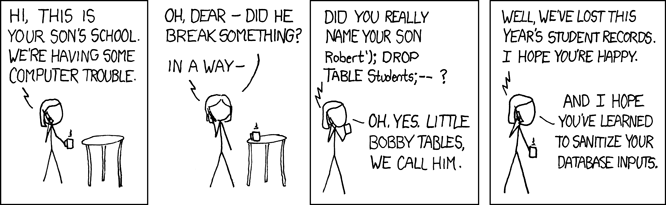

Deleting data in SQL is very dangerous. Once it's done, you cannot undo it. Because of this, deletions almost always happen only in the application layer (for example, if you delete your account on a website) or are done by an experienced database administrator. In fact, if you're in a data analytics position, you almost never even have the permission to delete from a database.

That being said, it's important to know how to do because of the impact it can have on a database.

The structure of a **DELETE** statement is very similar to an **UPDATE** statement--we specify the table and then use a **WHERE** clause to filter for the rows we want to delete.

Let's say Bernadetta decides to drop out, so we delete her from the database:

In [ ]:
%%sql
--demonstrate deletes
DELETE FROM Student
WHERE s_id = 2

If we **SELECT** * again, that row should be missing from the database.

If we want to delete the whole table, we can simply use **DROP TABLE**. Again, this is permanent, so be careful. This is one of many reasons why backups, in the form of scripts or copies of the database, are so important and essentially ubiquitous in all organizations.

In [ ]:
%%sql
--demonstrating drops
DROP TABLE Student

Now that we've done that, our table is gone for good. Of course, we could simply run the **CREATE** and **INSERT** statements to restore it to its original state. Aren't you glad we have a backup?

There is one other legitimate use of the **DELETE** statement that we saw earlier. If we place a **DROP TABLE IF EXISTS** statement before a **CREATE** statement, we will avoid having to manually drop the table if we want to modify the schema later. The **DROP TABLE** statement will either do nothing if the table doesn't exist, or drop the table and immediately recreate it.

####Exercise 5.4
Delete a row in your table

In [ ]:
%%sql
--Place your answer here!

###Summary
SQL provides robust functionality to define schemas, insert data, and modify it.

| Keyword       | Definition                                       |
|---------------|--------------------------------------------------|
| CREATE        | Create a table                                   |
| INSERT INTO   | Specify the table into which we insert data       |
| VALUES        | A comma-delimited list of all the rows we wish to insert |
| UPDATE        | Specify the table whose rows we want to update    |
| SET           | Set the value of a column for a row or set of rows|
| DELETE FROM   | Specify the table to permanently delete rows from |
| DROP TABLE    | Permanently delete the table                      |

### Chapter Exercise

1. Design a table for anything you wish. Examples include a table containing product information for a store, a table for hospital appointments, or a table for NFL player stats. It should have a *primary key*, at least one column containing text data, and another containing numerical data. At least one of the columns should have some kind of constraint (**UNIQUE**, **NOT NULL**, etc)
2. Insert at least 3 rows into your table
3. Imagine a scenario in which you would have to modify data in your table, and then write the SQL code modifying those rows
4. Image a scenario in which you would have to delete at least one row from your table, then delete it.

Challenge: Create another table related to the one you just created, such that you can join them using a *foreign key*. (HINT: use the **FOREIGN KEY** constraint in your **CREATE** statement)

In [ ]:
%%sql
--Create your table here:

In [ ]:
%%sql
--Insert your data here:

In [ ]:
%%sql
--Modify your data here:

In [ ]:
%%sql
--Delete your data here:

In [ ]:
%%sql
--Challenge: Create your other table here